In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Agriculture - 1

In [2]:
data = pd.read_excel('Agriculture-1.xlsx')
data.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare),50% of C2,MSP = C2+50% of C2,1.5 Times MSP Formula = 1.5 times the A2+FL costs
0,Arhar,Uttar Pradesh,9794.05,23076.74,1941.55,9.83,970.78,2912.33,14691.075
1,Arhar,Karnataka,10593.15,16528.68,2172.46,7.47,1086.23,3258.69,15889.725
2,Arhar,Gujarat,13468.82,19551.90,1898.30,9.59,949.15,2847.45,20203.230
3,Arhar,Andhra Pradesh,17051.66,24171.65,3670.54,6.42,1835.27,5505.81,25577.490
4,Arhar,Maharashtra,17130.55,25270.26,2775.80,8.72,1387.90,4163.70,25695.825


In [3]:
data.shape # to know total number of rows and columns

(49, 9)

### Ploting total yield with respective of each crop

No handles with labels found to put in legend.


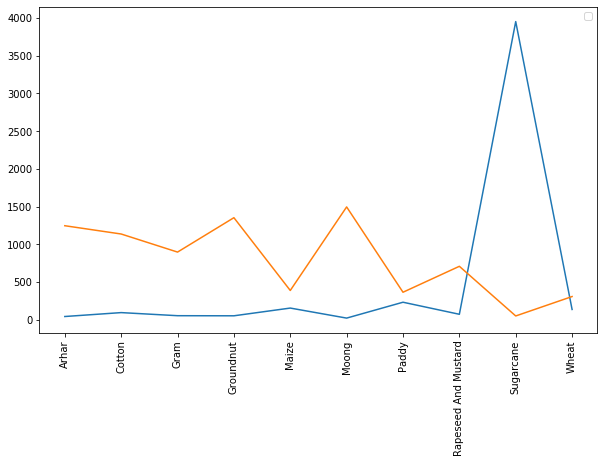

In [4]:
fig,axs = plt.subplots(figsize=(10,6))
crop_wise_yield = data.groupby(['Crop']).sum()['Yield (Quintal/ Hectare)']
plt.plot(crop_wise_yield)
crop_wise_production = data.groupby(['Crop']).sum()['Cost of Production (`/Quintal) C2']/10
plt.plot(crop_wise_production)
plt.xticks(rotation ='vertical')
plt.legend()

### Ploting cost of production and yeild with respective of each state

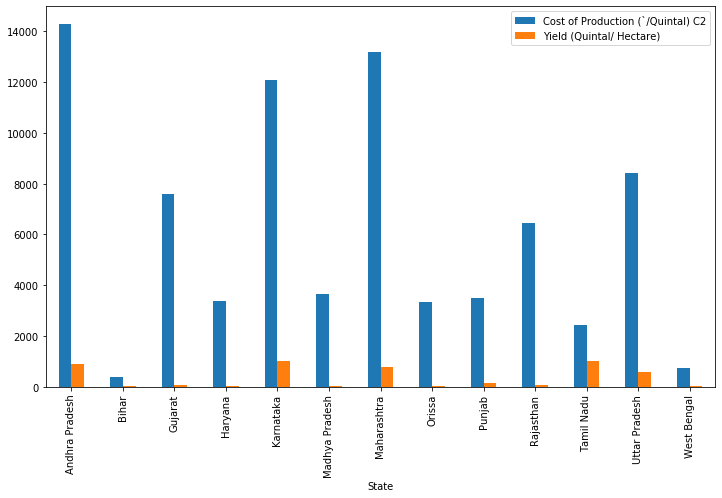

In [5]:
state_crop_yield = data.groupby(['State'])
index = list(state_crop_yield.indices.keys())
state_crop_yield.sum()[['Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare)']].plot(kind='bar',figsize=(12,7))

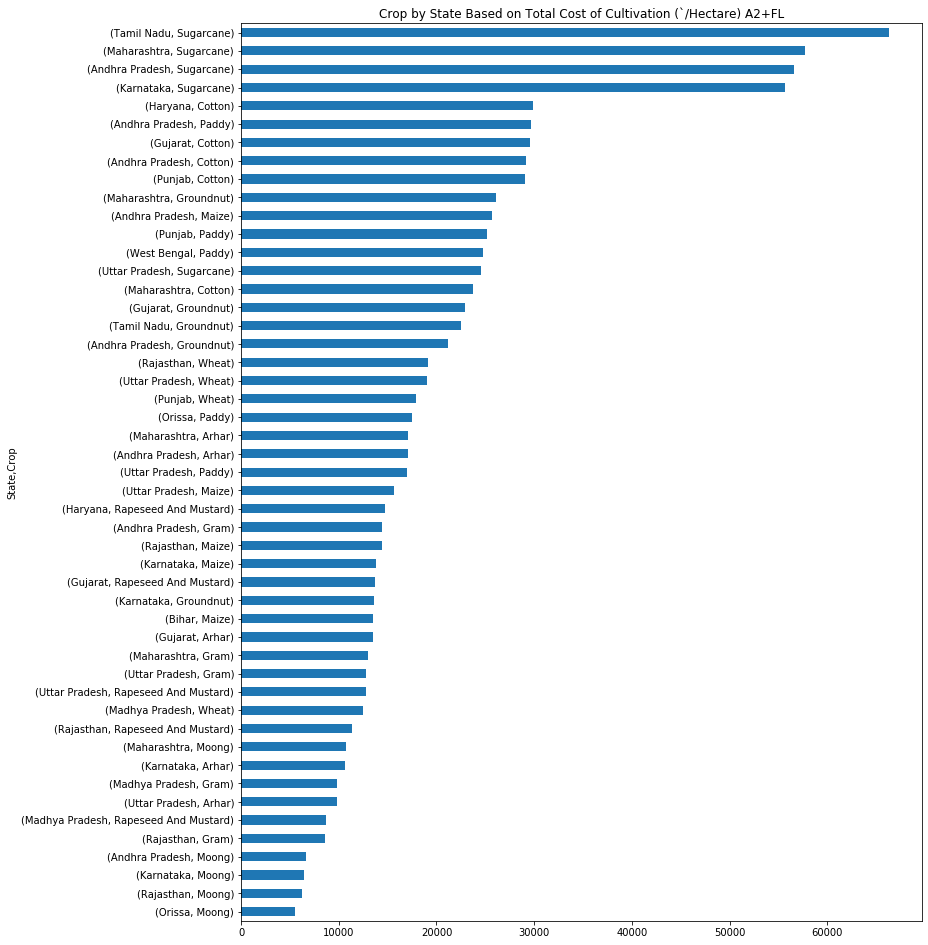

In [6]:
data.groupby(['State', 'Crop'])['Cost of Cultivation (`/Hectare) A2+FL'].sum().sort_values(ascending = True).plot(kind = 'barh',figsize = (13,13))
plt.tight_layout()
plt.title('Crop by State Based on Total Cost of Cultivation (`/Hectare) A2+FL')
plt.show()

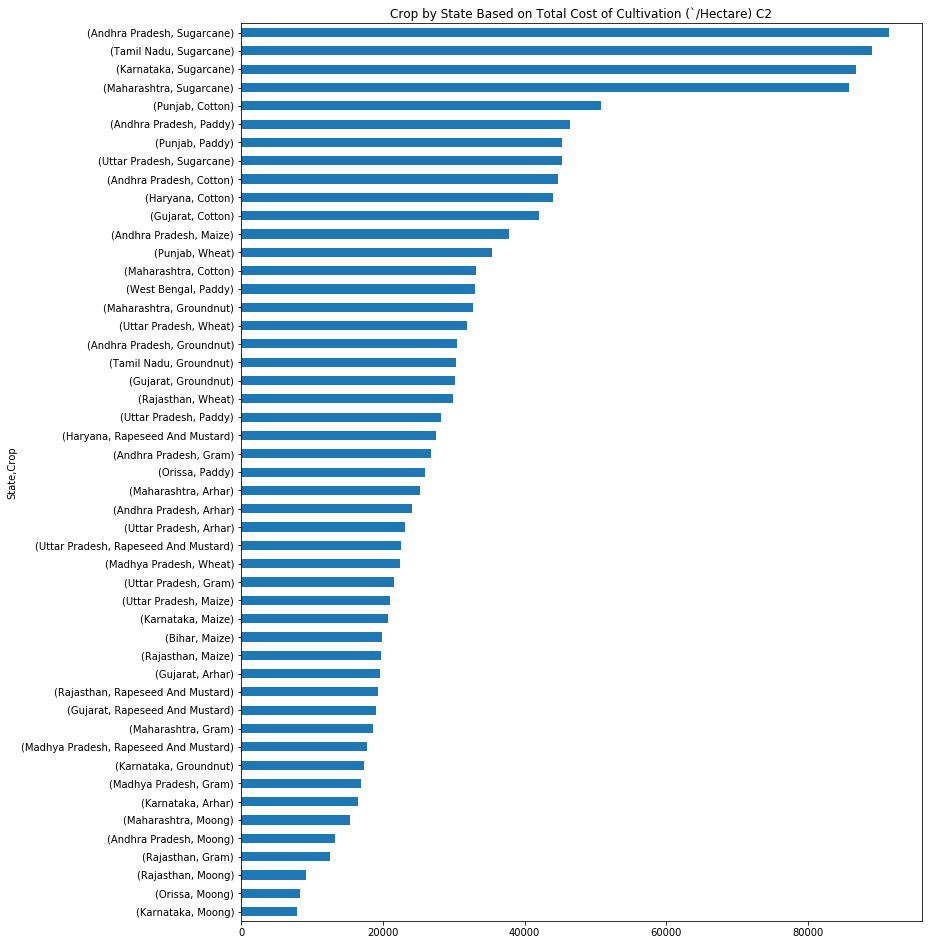

In [7]:
data.groupby(['State', 'Crop'])['Cost of Cultivation (`/Hectare) C2'].sum().sort_values(ascending = True).plot(kind = 'barh',figsize = (13,13))
plt.tight_layout()
plt.title('Crop by State Based on Total Cost of Cultivation (`/Hectare) C2')
plt.show()

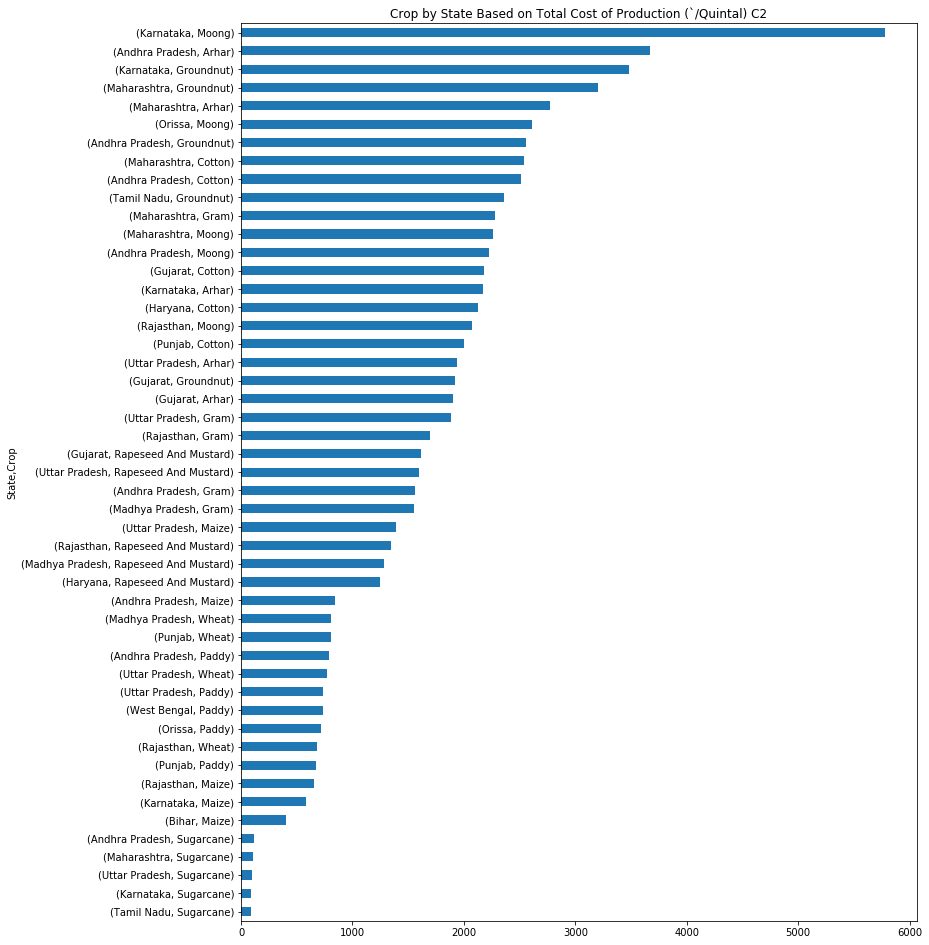

In [8]:
data.groupby(['State', 'Crop'])['Cost of Production (`/Quintal) C2'].sum().sort_values(ascending = True).plot(kind = 'barh',figsize = (13,13))
plt.tight_layout()
plt.title('Crop by State Based on Total Cost of Production (`/Quintal) C2')
plt.show()

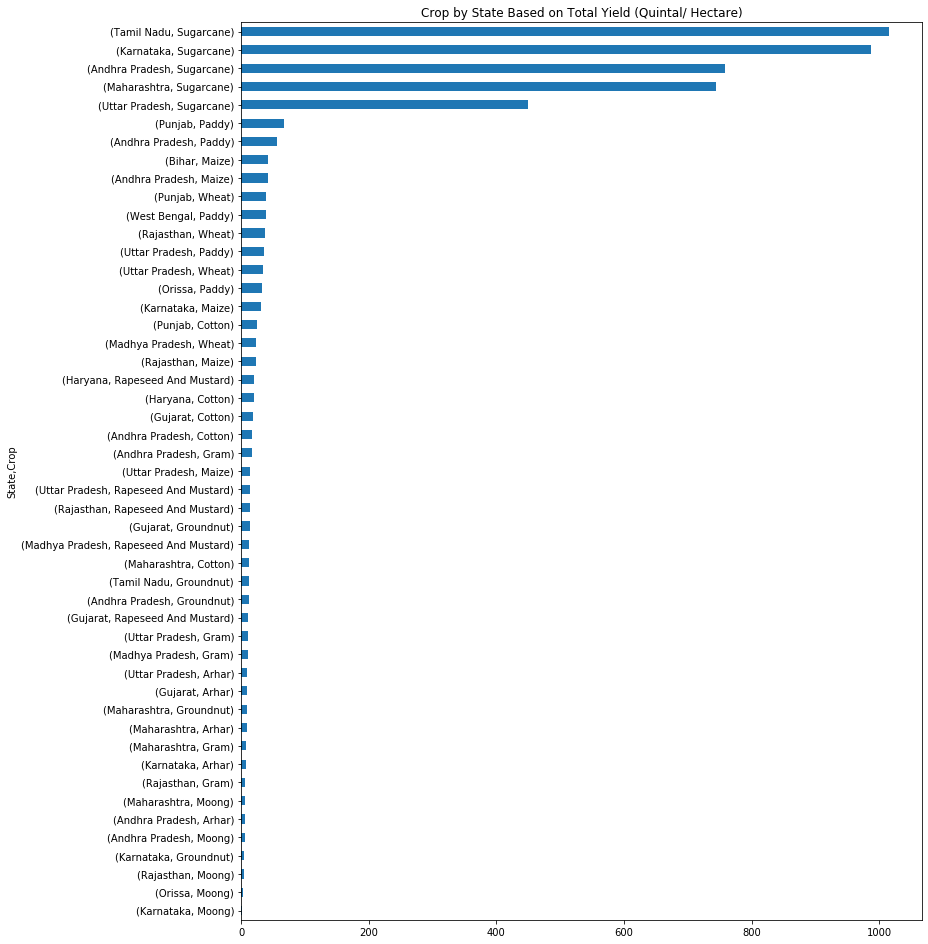

In [9]:
data.groupby(['State', 'Crop'])['Yield (Quintal/ Hectare)'].sum().sort_values(ascending = True).plot(kind = 'barh',figsize = (13,13))
plt.tight_layout()
plt.title('Crop by State Based on Total Yield (Quintal/ Hectare)')
plt.show()

C:\Users\NEELAGIRI LOKESH\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\NEELAGIRI LOKESH\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


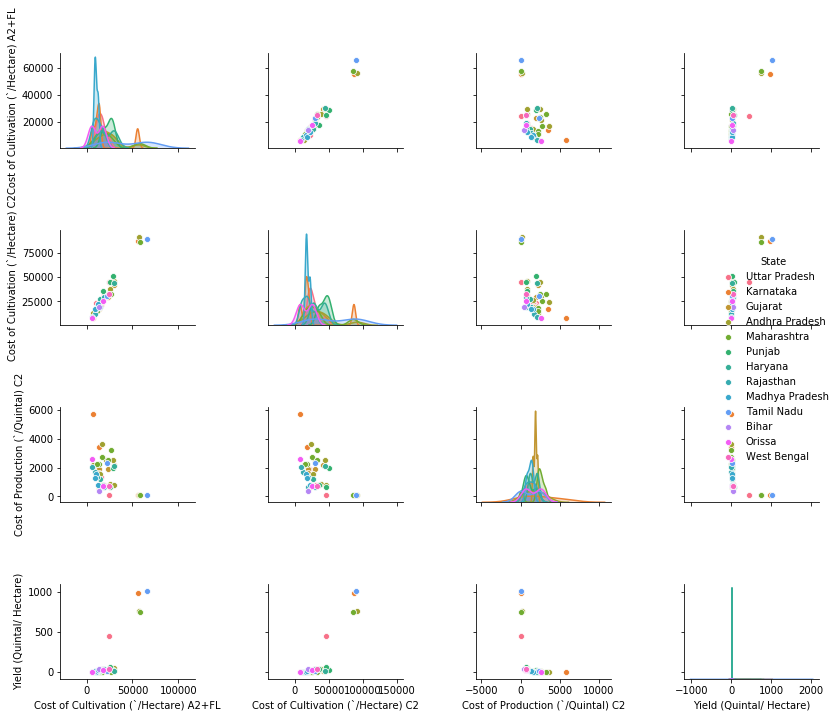

In [10]:
# pairplot based on state
sns.pairplot(data[['State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare)']], hue = 'State')
plt.tight_layout()
plt.show()

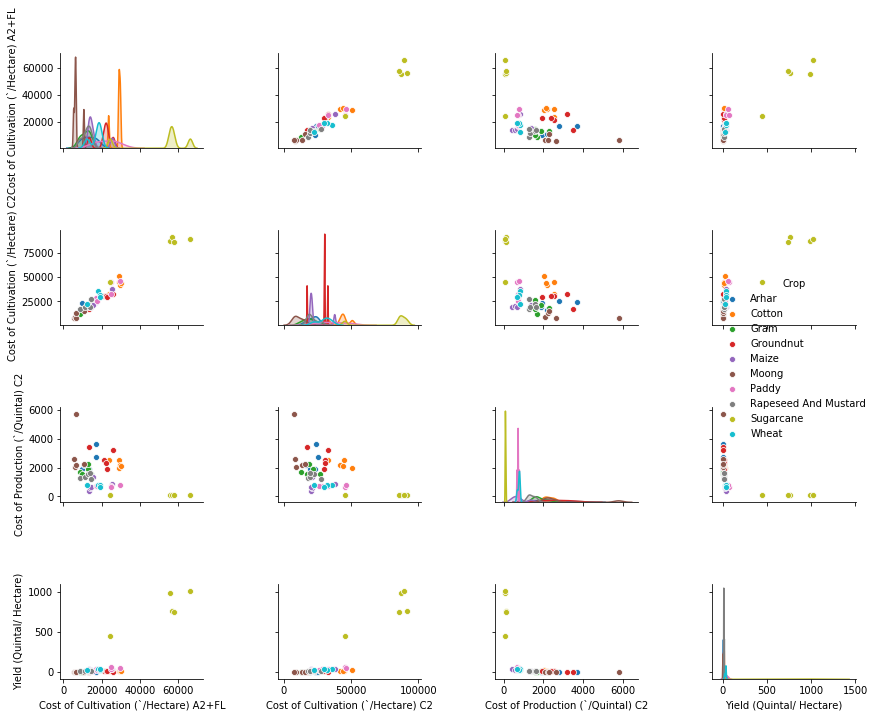

In [11]:
# pairplot based on Crop
sns.pairplot(data[['Crop', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare)']], hue = 'Crop')
plt.tight_layout()
plt.show()

# Agriculture - 2

In [14]:
production_data = pd.read_excel('Agriculture-2.xlsx')
production_data.shape

(55, 16)

In [15]:
production_data.head()

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8


In [16]:
production_data.columns = ['Crop', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11']

In [17]:
k = production_data[['Crop', 'Production 2006-07', 'Production 2007-08', 'Production 2008-09', 'Production 2009-10', 'Production 2010-11']].groupby('Crop')
index = list(k.indices.keys())
index[-8:-2]

['Total Foodgrains',
 'Total Fruits & Vegetables',
 'Total Non-Food grains ',
 'Total Oilseeds',
 'Total Pulses',
 'Total Spices']

Text(0, 0.5, 'production in quintal')

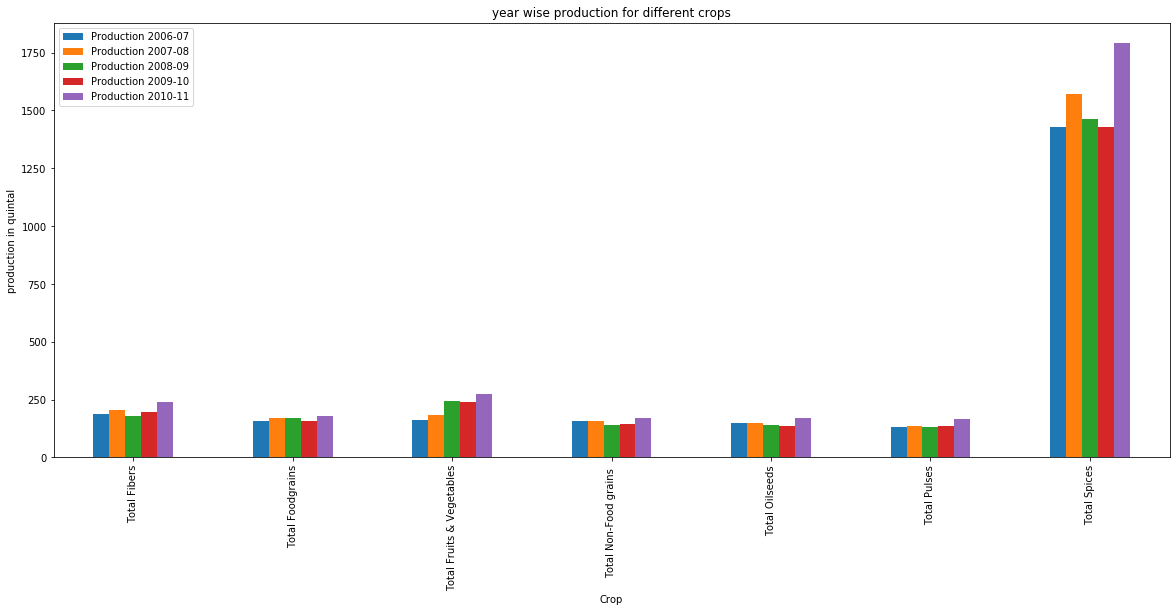

In [18]:
k.sum()[-9:-2].plot(figsize=(20,8), kind='bar');
plt.title('year wise production for different crops')
plt.ylabel('production in quintal')

Text(0, 0.5, 'production in quintal')

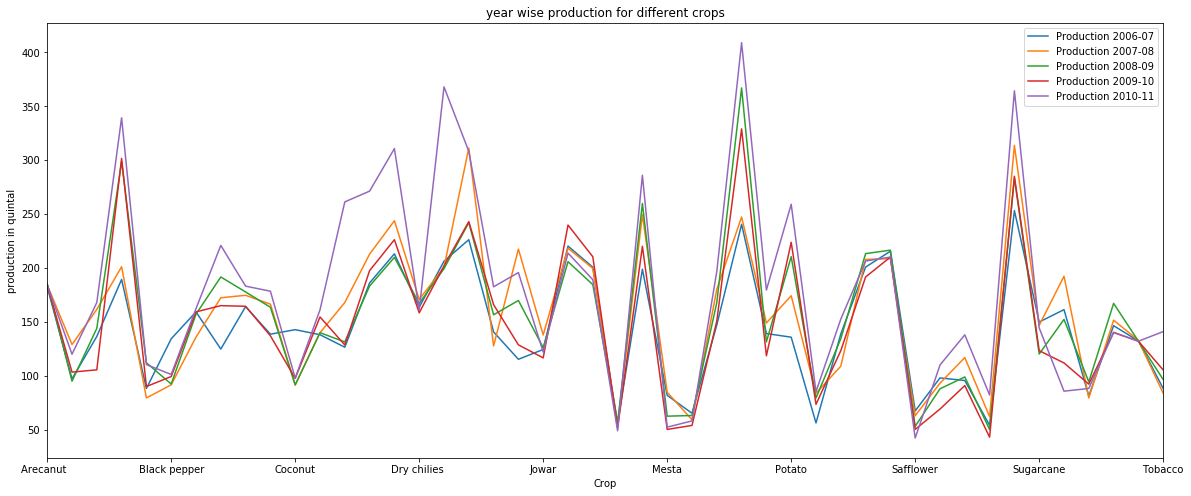

In [19]:
k.sum()[:-9].plot(figsize=(20,8), kind='line');
plt.title('year wise production for different crops')
plt.ylabel('production in quintal')

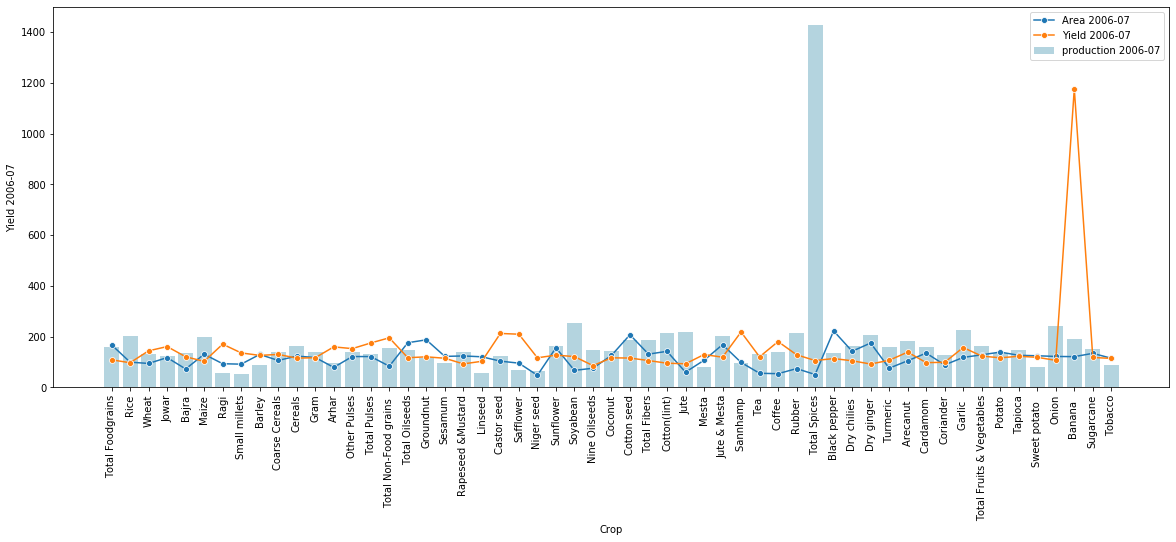

In [20]:
# 2006-07
plt.figure(figsize=(20,7))
sns.barplot(data = production_data, x='Crop', y='Production 2006-07',color='lightblue',label = 'production 2006-07')
sns.lineplot(data = production_data, x='Crop', y='Area 2006-07',marker='o',label = 'Area 2006-07')
sns.lineplot(data = production_data, x='Crop', y='Yield 2006-07',marker='o',label = 'Yield 2006-07')
plt.xticks(rotation=90)
plt.show()

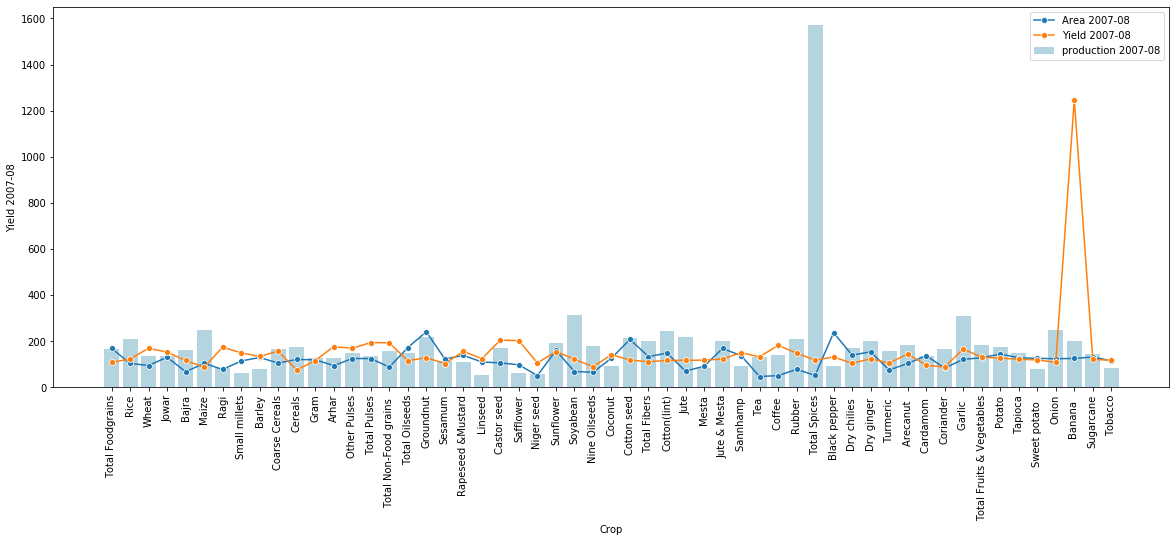

In [21]:
# 2007-08
plt.figure(figsize=(20,7))
sns.barplot(data = production_data, x='Crop', y='Production 2007-08',color='lightblue',label = 'production 2007-08')
sns.lineplot(data = production_data, x='Crop', y='Area 2007-08',marker='o',label = 'Area 2007-08')
sns.lineplot(data = production_data, x='Crop', y='Yield 2007-08',marker='o',label = 'Yield 2007-08')
plt.xticks(rotation=90)
plt.show()

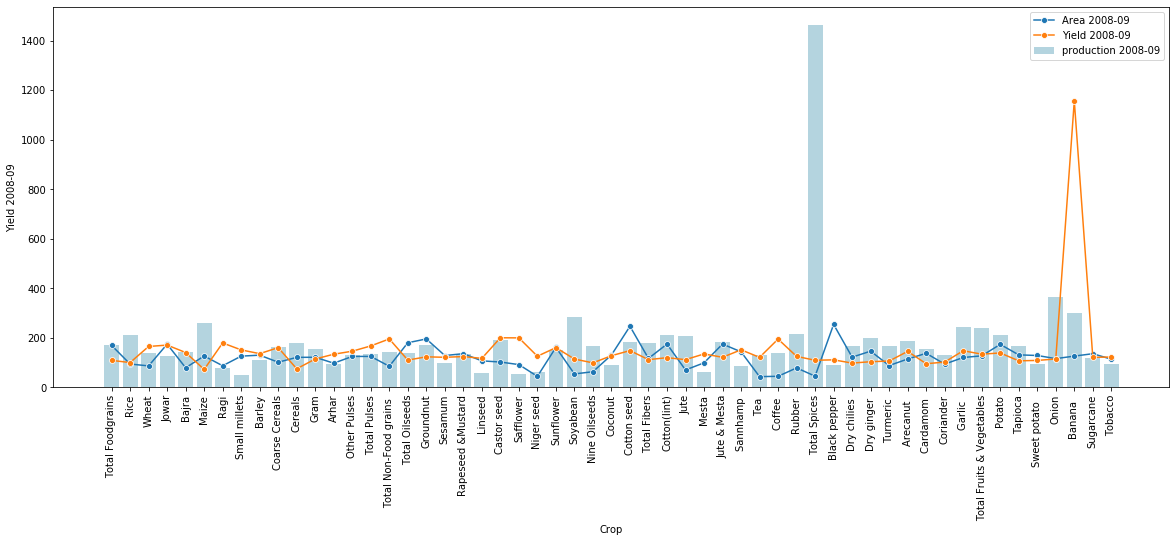

In [22]:
# 2008-09
plt.figure(figsize=(20,7))
sns.barplot(data = production_data, x='Crop', y='Production 2008-09',color='lightblue',label = 'production 2008-09')
sns.lineplot(data = production_data, x='Crop', y='Area 2008-09',marker='o',label = 'Area 2008-09')
sns.lineplot(data = production_data, x='Crop', y='Yield 2008-09',marker='o',label = 'Yield 2008-09')
plt.xticks(rotation=90)
plt.show()

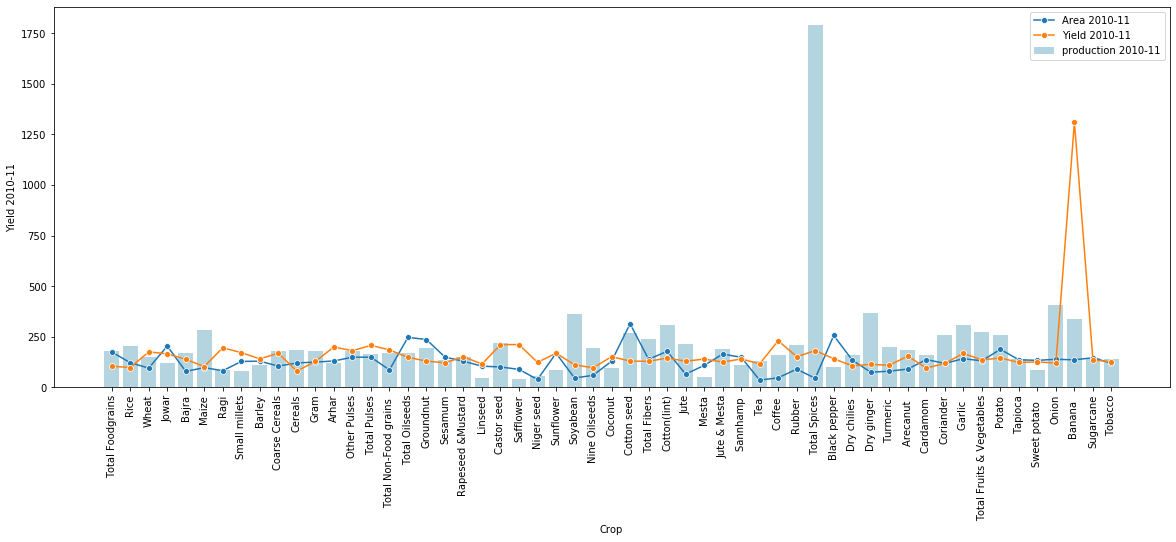

In [23]:
# 2010-11
plt.figure(figsize=(20,7))
sns.barplot(data = production_data, x='Crop', y='Production 2010-11',color='lightblue',label = 'production 2010-11')
sns.lineplot(data = production_data, x='Crop', y='Area 2010-11',marker='o',label = 'Area 2010-11')
sns.lineplot(data = production_data, x='Crop', y='Yield 2010-11',marker='o',label = 'Yield 2010-11')
plt.xticks(rotation=90)
plt.show()

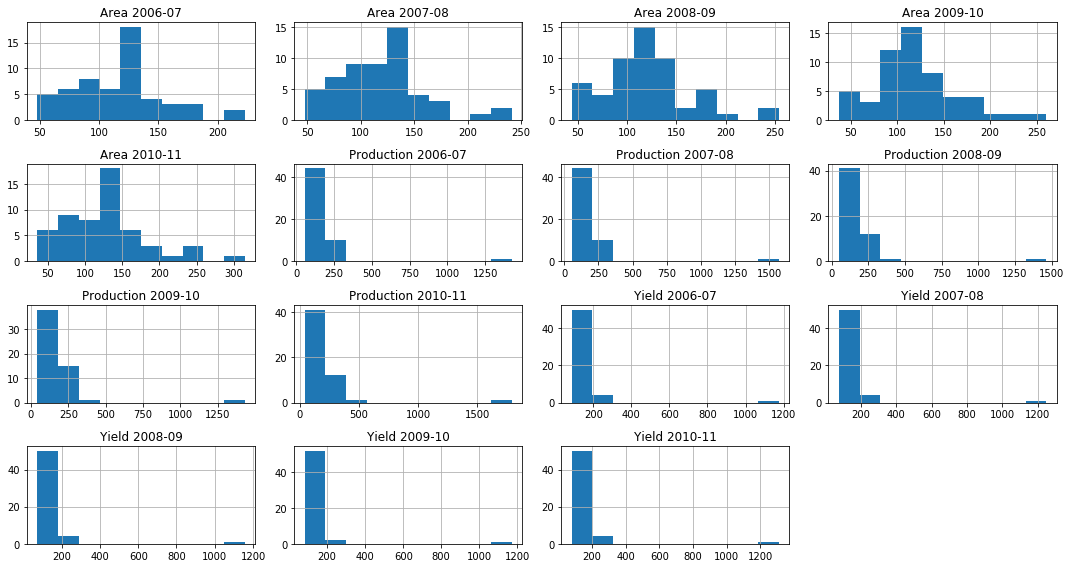

In [24]:
production_data.select_dtypes(include= np.float64).hist(figsize = (15,8))
plt.tight_layout()
plt.show()

# Agriculture - 3

In [25]:
recommended_zone = pd.read_excel('Agriculture-3.xlsx')
recommended_zone.head()

,Crop,Variety,Season/ duration in days,Recommended Zone
0,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra..."
1,Paddy,CR Dhan 601 (IET 18558),160,"Boro Area of Orissa, West Bengal and Assam."
2,Paddy,CR Dhan 501 (IET 19189),152,Semi deep water condition of Uttar Pradesh and...
3,Paddy,RC Maniphou 11 (IET 20193),132-135,Terraced area of Meghalaya and Manipur hills b...
4,Wheat,MPO(JW) 1215 (MPO 1215),120,"Madhya Pradesh, Chhattisgarh, Gujarat and Raja..."


In [26]:
recommended_zone.shape

(43, 4)

In [27]:
recommended_zone.dropna(inplace=True)

In [28]:
recommended_zone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 42
Data columns (total 4 columns):
Crop                        43 non-null object
Variety                     43 non-null object
Season/ duration in days    43 non-null object
Recommended Zone            43 non-null object
dtypes: object(4)
memory usage: 1.7+ KB


In [29]:
def state1(row):
    if 'Andhra Pradesh' in row['Recommended Zone']:
        return 1
def state2(row):
    if 'Tamil Nadu' in row['Recommended Zone']:
        return 1
def state3(row):
    if 'Gujarat' in row['Recommended Zone']:
        return 1
def state4(row):
    if 'Orissa' in row['Recommended Zone']:
        return 1
def state5(row):
    if 'Punjab' in row['Recommended Zone']:
        return 1
def state6(row):
    if 'Haryana' in row['Recommended Zone']:
        return 1
def state7(row):
    if 'Uttar Pradesh' in row['Recommended Zone']:
        return 1
def state8(row):
    if 'Rajasthan' in row['Recommended Zone']:
        return 1
def state9(row):
    if 'Karnataka' in row['Recommended Zone']:
        return 1
def state10(row):
    if 'Madhya Pradesh' in row['Recommended Zone']:
        return 1
def state11(row):
    if 'West Bengal' in row['Recommended Zone']:
        return 1

In [30]:
recommended_zone['Andhra Pradesh'] = recommended_zone.apply(state1,axis=1)
recommended_zone['Tamil Nadu']=recommended_zone.apply(state2,axis=1)
recommended_zone['Gujarat']=recommended_zone.apply(state3,axis=1)
recommended_zone['Orissa']=recommended_zone.apply(state4,axis=1)
recommended_zone['Punjab']=recommended_zone.apply(state5,axis=1)
recommended_zone['Haryana']=recommended_zone.apply(state6,axis=1)
recommended_zone['Uttar Pradesh']=recommended_zone.apply(state7,axis=1)
recommended_zone['Rajasthan']=recommended_zone.apply(state8,axis=1)
recommended_zone['Karnataka']=recommended_zone.apply(state9,axis=1)
recommended_zone['Madhya Pradesh']=recommended_zone.apply(state10,axis=1)
recommended_zone['West Bangal']=recommended_zone.apply(state11,axis=1)
# Added the eleven states as columns in the dataframe  

In [31]:
recommended_zone.fillna(0).head()

,Crop,Variety,Season/ duration in days,Recommended Zone,Andhra Pradesh,Tamil Nadu,Gujarat,Orissa,Punjab,Haryana,Uttar Pradesh,Rajasthan,Karnataka,Madhya Pradesh,West Bangal
0,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra...",1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Paddy,CR Dhan 601 (IET 18558),160,"Boro Area of Orissa, West Bengal and Assam.",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Paddy,CR Dhan 501 (IET 19189),152,Semi deep water condition of Uttar Pradesh and...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Paddy,RC Maniphou 11 (IET 20193),132-135,Terraced area of Meghalaya and Manipur hills b...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Wheat,MPO(JW) 1215 (MPO 1215),120,"Madhya Pradesh, Chhattisgarh, Gujarat and Raja...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


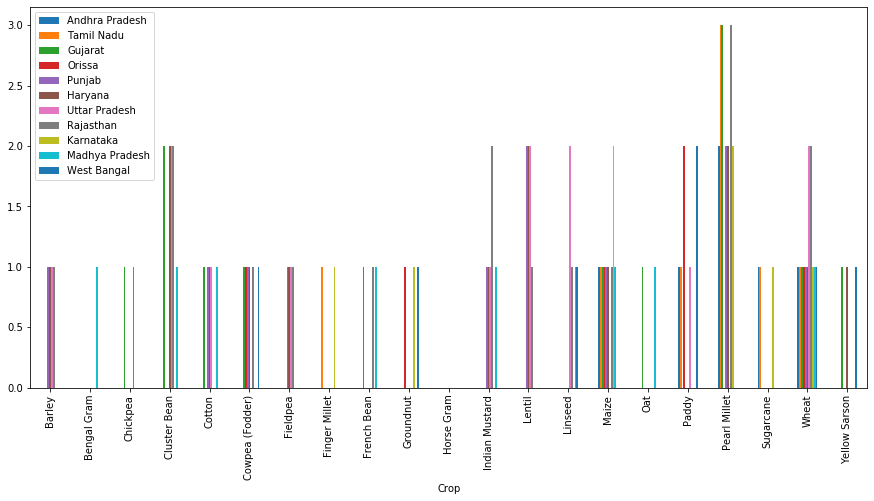

In [32]:
dataframe = recommended_zone.groupby('Crop').sum().plot(kind='bar',figsize=(15,7))
dataframe
# wheat is almost sown in all the mentioned states
# suitable zones for paddy is Orissa and west Bengal

In [33]:
dataframe = pd.DataFrame(recommended_zone.groupby('Season/ duration in days').count().reset_index())
dataframe1 = pd.DataFrame([dataframe.loc[1:27].sum(),dataframe.loc[29:37].sum()])
dataframe1.drop('Season/ duration in days',axis=1,inplace=True)
dataframe1 = dataframe1.assign(Duration = ['100-190','70-100']) 

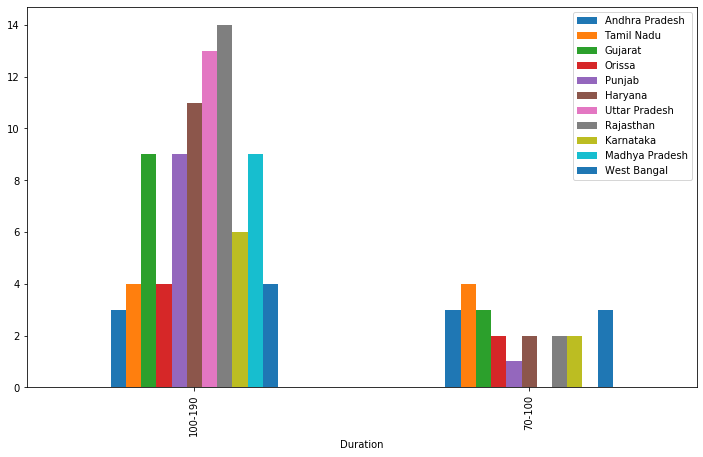

In [34]:
dataframe1[['Andhra Pradesh', 'Tamil Nadu',
       'Gujarat', 'Orissa', 'Punjab', 'Haryana', 'Uttar Pradesh', 'Rajasthan',
       'Karnataka', 'Madhya Pradesh', 'West Bangal', 'Duration']].plot(x = 'Duration',kind='bar',figsize=(12,7))
# most favorable state for growing crops in 100-190 days is UP and Rajasthan
# for 70-100 days it is Gujarat

In [35]:
dataframe1
# max number of crops are sown for 100-190 days not for 70-100 days

,Crop,Variety,Recommended Zone,Andhra Pradesh,Tamil Nadu,Gujarat,Orissa,Punjab,Haryana,Uttar Pradesh,Rajasthan,Karnataka,Madhya Pradesh,West Bangal,Duration
0,33.0,33.0,33.0,3.0,4.0,9.0,4.0,9.0,11.0,13.0,14.0,6.0,9.0,4.0,100-190
1,8.0,8.0,8.0,3.0,4.0,3.0,2.0,1.0,2.0,0.0,2.0,2.0,0.0,3.0,70-100


# Agriculture - 4

In [37]:
data2 = pd.read_excel('Agriculture-4.xlsx')
data2

,Crop,2004-05-01 00:00:00,2005-06-01 00:00:00,2006-07-01 00:00:00,2007-08-01 00:00:00,2008-09-01 00:00:00,2009-10-01 00:00:00,2010-11-01 00:00:00,2011-12-01 00:00:00,Average of 2004-2011
0,Rice,100,101,99,105,112,121,117,110,108.125
1,Wheat,100,101,112,115,117,127,120,108,112.500
2,Coarse Cereals,100,107,110,115,113,123,122,136,115.750
3,Pulses,100,108,134,124,124,146,137,129,125.250
4,Vegetables,100,109,103,118,113,124,128,115,113.750
5,Fruits,100,99,99,98,102,104,114,119,104.375
6,Milk,100,97,98,98,98,112,123,124,106.250
7,"Eggs, Fish and Meat",100,102,101,100,99,116,133,137,111.000
8,Oilseeds,100,86,85,97,104,103,99,102,97.000
9,Sugarcane,100,96,91,87,80,81,109,107,93.875


In [38]:
data2.shape

(12, 10)

In [39]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
Crop                    12 non-null object
2004-05-01 00:00:00     12 non-null int64
2005-06-01 00:00:00     12 non-null int64
2006-07-01 00:00:00     12 non-null int64
2007-08-01 00:00:00     12 non-null int64
2008-09-01 00:00:00     12 non-null int64
2009-10-01 00:00:00     12 non-null int64
2010-11-01 00:00:00     12 non-null int64
2011-12-01 00:00:00     12 non-null int64
Average of 2004-2011    12 non-null float64
dtypes: float64(1), int64(8), object(1)
memory usage: 1.0+ KB


In [40]:
data2.describe()

,2004-05-01 00:00:00,2005-06-01 00:00:00,2006-07-01 00:00:00,2007-08-01 00:00:00,2008-09-01 00:00:00,2009-10-01 00:00:00,2010-11-01 00:00:00,2011-12-01 00:00:00,Average of 2004-2011
count,12.0,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000
mean,100.0,99.75000,102.000000,104.750000,106.416667,114.916667,121.916667,120.750000,108.81250
std,0.0,6.64865,12.634728,10.963783,11.261022,15.900019,11.405408,12.800036,8.26041
min,100.0,86.00000,85.000000,87.000000,80.000000,81.000000,99.000000,102.000000,93.87500
25%,100.0,96.75000,96.250000,97.750000,101.250000,106.250000,116.250000,109.500000,105.78125
50%,100.0,100.00000,100.000000,102.000000,107.500000,115.500000,122.500000,120.500000,108.93750
75%,100.0,103.25000,104.750000,115.000000,113.000000,123.250000,129.250000,130.750000,112.81250
max,100.0,109.00000,134.000000,124.000000,124.000000,146.000000,138.000000,140.000000,125.25000


Total crop on the year of 2004-05-01 00:00:00


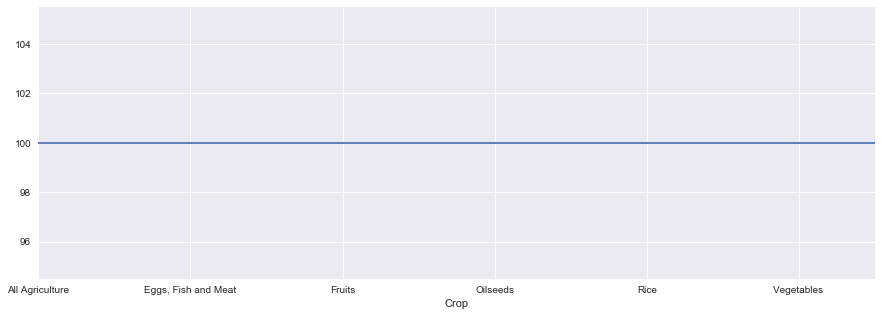

Total crop on the year of 2005-06-01 00:00:00


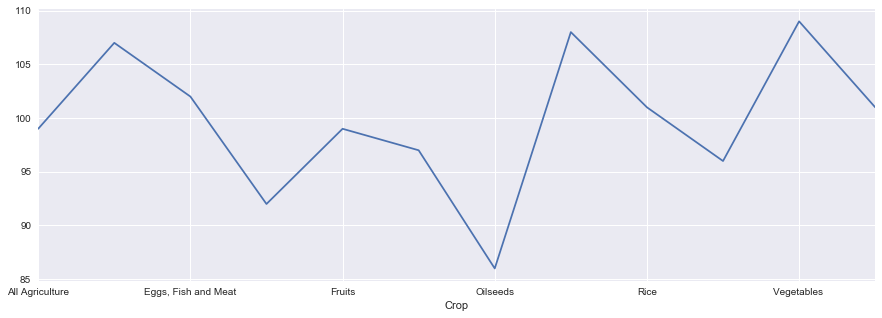

Total crop on the year of 2006-07-01 00:00:00


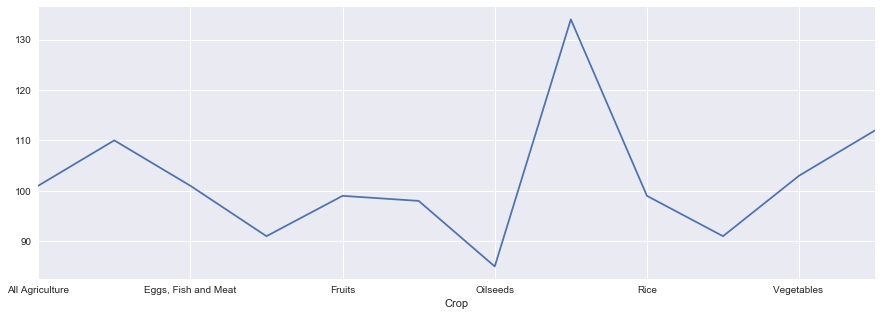

Total crop on the year of 2007-08-01 00:00:00


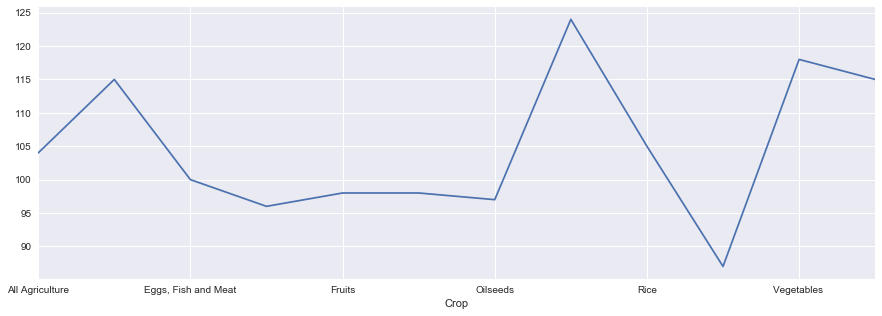

Total crop on the year of 2008-09-01 00:00:00


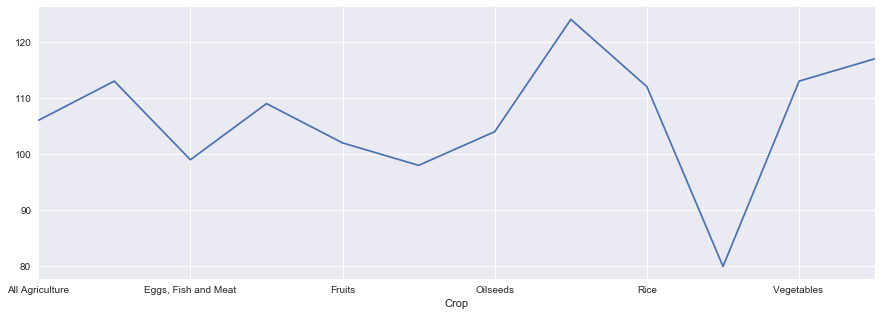

Total crop on the year of 2009-10-01 00:00:00


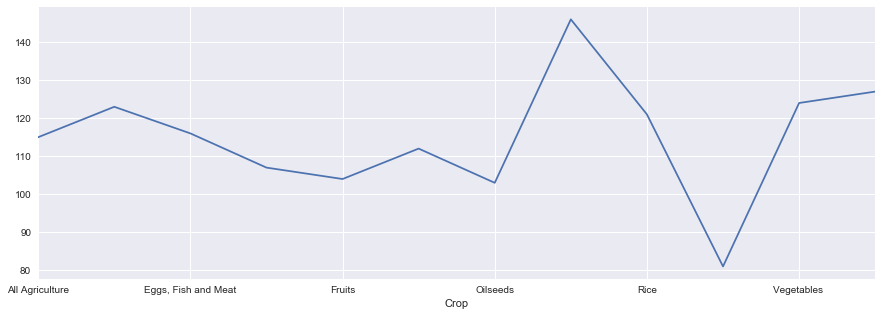

Total crop on the year of 2010-11-01 00:00:00


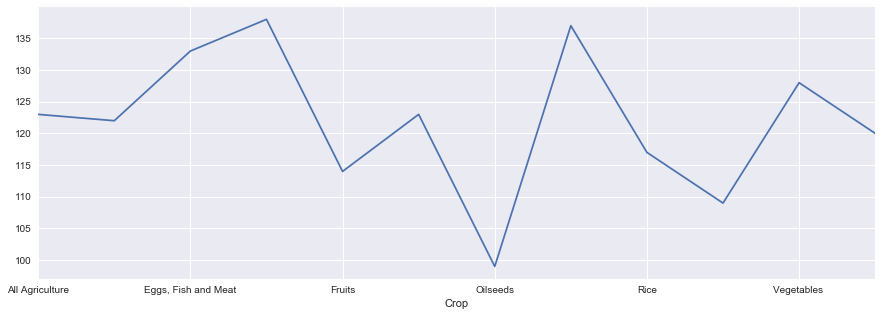

Total crop on the year of 2011-12-01 00:00:00


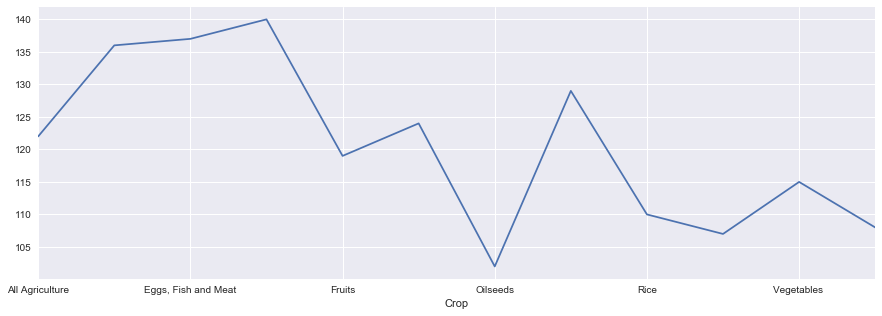

Total crop on the year of Average of 2004-2011


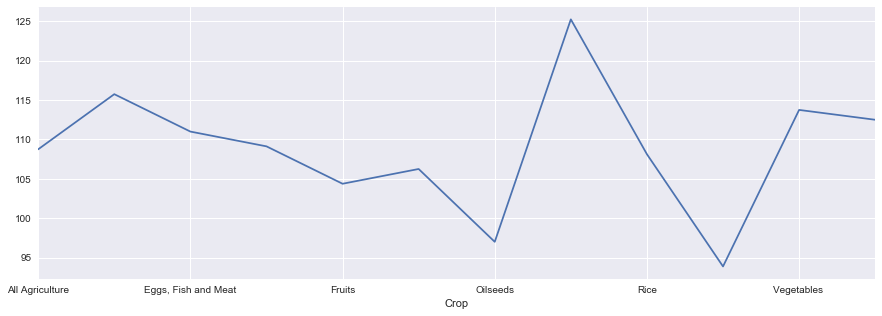

In [41]:
# total production on each year by crop
plt.style.use('seaborn')
for i in data2.columns[1:]:
    print('Total crop on the year of {}'.format(i))
    data2.groupby('Crop')[i].sum().plot(kind = 'line', figsize = (15,5))
    plt.show()